In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline 

In [2]:
path = '/home/jupyter-d.bezhenar-15/shared/hall_of_fame/lesson_7/mini7/step_1_lesson_7 (1).csv'

In [3]:
df = pd.read_csv(path)

In [4]:
df

,date,user_type,visits
0,2020-06-15,People,417.0
1,2020-06-15,Robots,177.0
2,2020-06-16,People,472.0
3,2020-06-16,Robots,91.0
4,2020-06-17,People,475.0
5,2020-06-17,Robots,138.0


In [12]:
people = df.query('user_type == "People"')
robot = df.query('user_type == "Robots"')

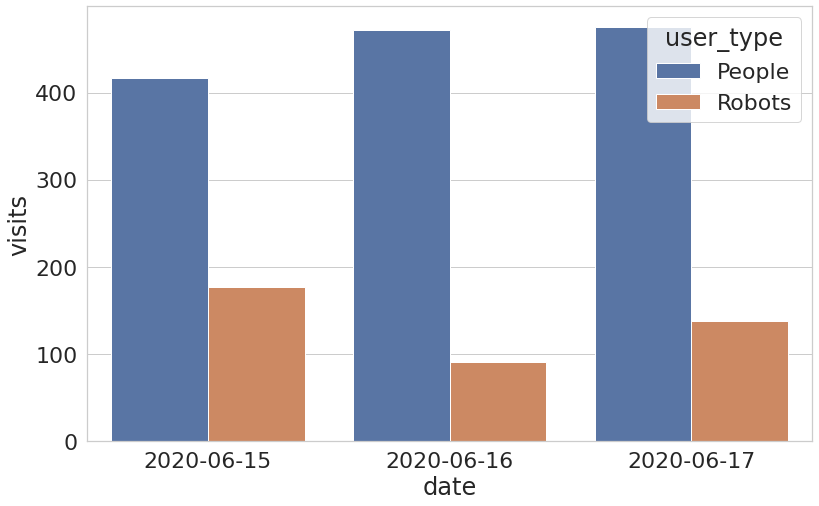

In [38]:
sns.set(
    font_scale =2,
    style      ="whitegrid",
    rc         ={'figure.figsize':(13,8)}
)
sns.barplot(x='date', y='visits', data = df, hue=df.user_type)
# b = sns.barplot(x='date', y='visits', data = robot)

In [18]:
import requests
from io import BytesIO

In [8]:
url = 'https://stepik.org/media/attachments/lesson/361618/step_2_lesson_7.csv'

In [21]:
req = requests.get(url)
data = req.content

df = pd.read_csv(BytesIO(data))

In [10]:
df

,date,browser,visits
0,2020-06-15,Google Chrome,354.0
1,2020-06-15,Firefox,58.0
2,2020-06-15,Yandex Browser,54.0
3,2020-06-15,Safari,41.0
4,2020-06-15,Chrome Mobile,31.0
5,2020-06-15,Opera,16.0
6,2020-06-15,Mobile Safari,16.0
7,2020-06-15,Samsung Internet,9.0
8,2020-06-15,Edge,5.0
9,2020-06-15,UCWEB,4.0


In [20]:
((df.visits[0] / df.visits.sum()) *100).round()

60.0

In [21]:
df.loc[0, 'visits']

354.0

In [22]:
url ='https://stepik.org/media/attachments/lesson/361618/step_3_lesson_7.csv'

In [29]:
df

,date,browser,user_type,visits
0,2020-06-15,Google Chrome,People,250.0
1,2020-06-15,Google Chrome,Robots,104.0
2,2020-06-15,Yandex Browser,People,47.0
3,2020-06-15,Firefox,Robots,31.0
4,2020-06-15,Chrome Mobile,People,31.0
5,2020-06-15,Firefox,People,27.0
6,2020-06-15,Safari,Robots,22.0
7,2020-06-15,Safari,People,19.0
8,2020-06-15,Mobile Safari,People,15.0
9,2020-06-15,Opera,People,11.0


In [41]:
sec = df.groupby('browser', as_index=False).agg({'visits':'sum'})

In [42]:
rob = df.query('user_type == "Robots"')

In [44]:
merg = rob.merge(sec, on='browser')

In [45]:
merg['perc'] = (merg.visits_x / merg.visits_y)*100

In [46]:
merg

,date,browser,user_type,visits_x,visits_y,perc
0,2020-06-15,Google Chrome,Robots,104.0,354.0,29.378531
1,2020-06-15,Firefox,Robots,31.0,58.0,53.448276
2,2020-06-15,Safari,Robots,22.0,41.0,53.658537
3,2020-06-15,Yandex Browser,Robots,7.0,54.0,12.962963
4,2020-06-15,Opera,Robots,5.0,16.0,31.250000
5,2020-06-15,UCWEB,Robots,4.0,4.0,100.000000
6,2020-06-15,Mobile Safari,Robots,1.0,16.0,6.250000
7,2020-06-15,Chromium,Robots,1.0,2.0,50.000000
8,2020-06-15,Edge,Robots,1.0,5.0,20.000000
9,2020-06-15,Samsung Internet,Robots,1.0,9.0,11.111111


In [20]:
url = 'https://stepik.org/media/attachments/lesson/361618/step_4_lesson_7.csv'

In [15]:
df

NameError: name 'df' is not defined

In [50]:
df.visits.sum()

594.0

In [52]:
((19 / df.visits.sum())*100).round(1)

3.2

In [2]:
import gspread
from df2gspread import df2gspread as d2g
from oauth2client.service_account import ServiceAccountCredentials

In [3]:
scope = ['https://spreadsheets.google.com/feeds',
         'https://www.googleapis.com/auth/drive']

my_mail = 'bezhenardv@gmail.com'
path_to_credential = '/home/jupyter-d.bezhenar-15/shared/hall_of_fame/lesson_7/prefab.json'

credentials = ServiceAccountCredentials.from_json_keyfile_name(path_to_credential, scope)
gs = gspread.authorize(credentials)

In [4]:
table_name = 'some_test'

In [6]:
gs.create(table_name)

<Spreadsheet 'some_test' id:1yV3eWTk7pR3lgM6fqeh4IiqijIOrJAJAGbi9O2VH_G0>

In [7]:
table = gs.open(table_name)

In [8]:
table.share(my_mail, perm_type='user', role='writer')

In [9]:
sheet_name = 'list11'

In [22]:
d2g.upload(df, table_name, sheet_name, credentials=credentials, row_names=True)

<Worksheet 'list11' id:1782143164>

In [25]:
df.to_excel('qqqq.xlsx')